In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("NaiveBayes.csv")
print(data.head())
print("Missing value : ",data.isnull().sum())

   Age  Salary  Purchased
0   19   19000          0
1   35   20000          0
2   26   43000          0
3   27   57000          0
4   19   76000          0
Missing value :  Age          0
Salary       0
Purchased    0
dtype: int64


In [4]:
# Impute missing numerical values with the median
data.fillna(data.median(), inplace=True)

# Impute missing categorical values with the mode (most frequent value)
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


In [9]:
# Define features and target variable
x = data.drop(['Purchased'], axis=1)
y = data['Purchased']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [12]:
y_pred=nb.predict(x_test)

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120


Confusion Matrix:
 [[72  1]
 [ 8 39]]


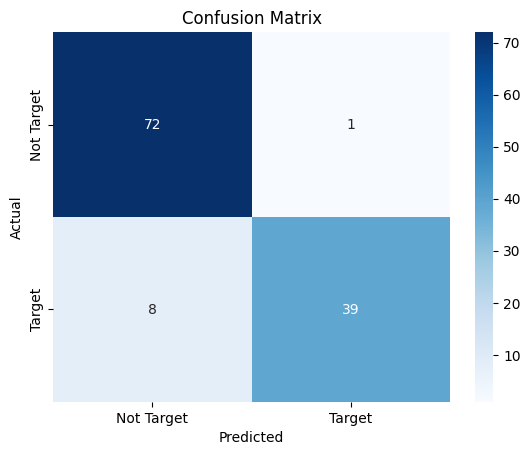

In [14]:
import seaborn as sns

# Create confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Target', 'Target'], yticklabels=['Not Target', 'Target'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120


Confusion Matrix:
 [[72  1]
 [ 8 39]]


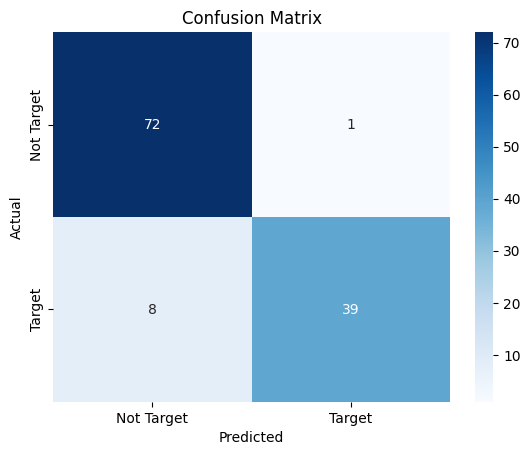